# STEP #0: LIBRARIES IMPORT

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [49]:
# Two datasets are available, let's load the first one:
movie_titles_df = pd.read_csv("Movie_Id_Titles")
movie_titles_df.head(20)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [50]:
movie_titles_df.shape

(1682, 2)

In [51]:
movies_rating_df = pd.read_csv('u.data', sep='\t',header=None)

In [52]:
movies_rating_df.head()

,0,1,2,3
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [53]:
movies_rating_df.columns=['user_id', 'item_id', 'rating', 'timestamp']

In [54]:
movies_rating_df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [55]:
# Let's drop the timestamp 
movies_rating_df.drop(['timestamp'], axis = 1, inplace = True)

In [56]:
movie_lst=list(movie_titles_df["title"])
id_m=list(movie_titles_df["item_id"])
rating_item_id=list(movies_rating_df["item_id"])

In [57]:
movie=[]
for i in range(0,len(rating_item_id)):
    for j in range(0, len(id_m)):
        if rating_item_id[i]==id_m[j]:
            movie.append(movie_lst[j])
        

In [58]:
len(movie)

100003

In [59]:
movies_rating_df["Movie_name"]=movie

In [60]:
movies_rating_df

,user_id,item_id,rating,Movie_name
0,0,50,5,Star Wars (1977)
1,0,172,5,"Empire Strikes Back, The (1980)"
2,0,133,1,Gone with the Wind (1939)
3,196,242,3,Kolya (1996)
4,186,302,3,L.A. Confidential (1997)
...,...,...,...,...
99998,880,476,3,"First Wives Club, The (1996)"
99999,716,204,5,Back to the Future (1985)
100000,276,1090,1,Sliver (1993)
100001,13,225,2,101 Dalmatians (1996)


In [61]:
movies_rating_df=movies_rating_df.reindex(columns=["user_id","item_id","Movie_name","rating"])

In [62]:
movies_rating_df

,user_id,item_id,Movie_name,rating
0,0,50,Star Wars (1977),5
1,0,172,"Empire Strikes Back, The (1980)",5
2,0,133,Gone with the Wind (1939),1
3,196,242,Kolya (1996),3
4,186,302,L.A. Confidential (1997),3
...,...,...,...,...
99998,880,476,"First Wives Club, The (1996)",3
99999,716,204,Back to the Future (1985),5
100000,276,1090,Sliver (1993),1
100001,13,225,101 Dalmatians (1996),2


In [64]:
movies_rating_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [65]:
movies_rating_df.isnull().sum()

user_id       0
item_id       0
Movie_name    0
rating        0
dtype: int64

In [71]:
group_rating_by_movie=movies_rating_df.groupby("Movie_name")["rating"].describe()

In [72]:
group_rating_by_movie

,count,mean,std,min,25%,50%,75%,max
Movie_name,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [74]:
rating_df_count=group_rating_by_movie["count"]

In [75]:
rating_df_mean=group_rating_by_movie["mean"]

In [76]:
rating_df_mean

Movie_name
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

In [77]:
ratings_mean_count_df=pd.concat([rating_df_count,rating_df_mean],axis=1)

In [81]:
ratings_mean_count_df.reset_index(inplace=True)

In [82]:
ratings_mean_count_df

,Movie_name,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444


# STEP #2: VISUALIZE DATASET

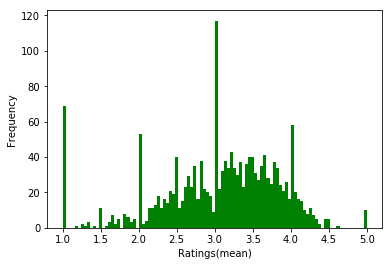

In [91]:
plt.hist(ratings_mean_count_df["mean"],bins=100,color="g")
plt.ylabel("Frequency")
plt.xlabel("Ratings(mean)")
plt.show()

In [86]:
len(ratings_mean_count_df["Movie_name"].unique())

1664

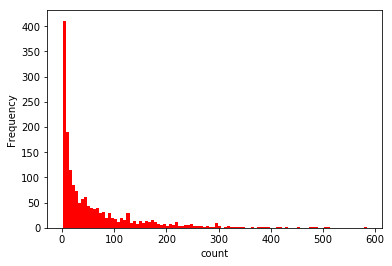

In [97]:
plt.hist(ratings_mean_count_df["count"],bins=100,color="r")
plt.ylabel("Frequency")
plt.xlabel("count")
plt.show()

In [94]:
ratings_mean_count_df[ratings_mean_count_df["mean"]==5]

,Movie_name,count,mean
30,Aiqing wansui (1994),1.0,5.0
462,Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
633,"Great Day in Harlem, A (1994)",1.0,5.0
944,Marlene Dietrich: Shadow and Light (1996),1.0,5.0
1172,Prefontaine (1997),3.0,5.0
1273,"Saint of Fort Washington, The (1993)",2.0,5.0
1277,Santa with Muscles (1996),2.0,5.0
1359,Someone Else's America (1995),1.0,5.0
1387,Star Kid (1997),3.0,5.0
1472,They Made Me a Criminal (1939),1.0,5.0


In [98]:
ratings_mean_count_df[ratings_mean_count_df["mean"]==1]

,Movie_name,count,mean
8,3 Ninjas: High Noon At Mega Mountain (1998),5.0,1.0
60,Amityville 1992: It's About Time (1992),5.0,1.0
65,Amityville: A New Generation (1993),5.0,1.0
66,Amityville: Dollhouse (1996),3.0,1.0
103,August (1996),1.0,1.0
...,...,...,...
1582,"Very Natural Thing, A (1974)",1.0,1.0
1584,"Vie est belle, La (Life is Rosey) (1987)",1.0,1.0
1610,Wend Kuuni (God's Gift) (1982),1.0,1.0
1646,"Woman in Question, The (1950)",1.0,1.0


In [99]:
ratings_mean_count_df[ratings_mean_count_df["count"].max()

584.0

In [100]:
ratings_mean_count_df[ratings_mean_count_df["count"]==584]

,Movie_name,count,mean
1398,Star Wars (1977),584.0,4.359589


In [102]:
ratings_mean_count_df.sort_values(by="count",ascending=False).head(30)

,Movie_name,count,mean
1398,Star Wars (1977),584.0,4.359589
333,Contact (1997),509.0,3.803536
498,Fargo (1996),508.0,4.155512
1234,Return of the Jedi (1983),507.0,4.007890
860,Liar Liar (1997),485.0,3.156701
460,"English Patient, The (1996)",481.0,3.656965
1284,Scream (1996),478.0,3.441423
1523,Toy Story (1995),452.0,3.878319
32,Air Force One (1997),431.0,3.631090
744,Independence Day (ID4) (1996),429.0,3.438228


In [103]:
ratings_mean_count_df.sort_values(by="count").head(30)

,Movie_name,count,mean
1663,Á köldum klaka (Cold Fever) (1994),1.0,3.0
980,Mille bolle blu (1993),1.0,1.0
951,Mat' i syn (1997),1.0,1.0
944,Marlene Dietrich: Shadow and Light (1996),1.0,5.0
931,"Man from Down Under, The (1943)",1.0,1.0
927,Mamma Roma (1962),1.0,4.0
915,Mad Dog Time (1996),1.0,3.0
166,"Big Bang Theory, The (1994)",1.0,4.0
911,MURDER and murder (1996),1.0,2.0
322,Coldblooded (1995),1.0,2.0


# STEP #3: PERFORM ITEM-BASED COLLABORATIVE FILTERING ON ONE MOVIE SAMPLE

In [105]:
userid_movietitle_matrix=movies_rating_df.pivot_table(index="user_id",columns="Movie_name",values="rating")

In [106]:
userid_movietitle_matrix

Movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
titanic = userid_movietitle_matrix['Titanic (1997)']

In [109]:
titanic.value_counts()

5.0    179
4.0    105
3.0     43
2.0     19
1.0      4
Name: Titanic (1997), dtype: int64

In [110]:
userid_movietitle_matrix.corr()

Movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
Movie_name,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,0.000000,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,0.144338,1.000000,1.0,NaN
187 (1997),-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,0.475327,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,0.680414,-0.361961,0.500000,0.132017,-0.518476,-0.154765,NaN,-0.054554,...,NaN,NaN,NaN,0.355001,0.722460,1.000000,0.866025,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,0.000000,0.144338,0.475327,0.204926,0.623795,-0.341753,NaN,0.707107,...,NaN,NaN,NaN,-0.413197,-0.019672,0.866025,1.000000,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,0.707107,1.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [113]:
userid_movietitle_matrix.corrwith(titanic)

C:\Users\SK SUJAN ISLAM\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\SK SUJAN ISLAM\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Movie_name
'Til There Was You (1997)               -0.062017
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.120113
12 Angry Men (1957)                      0.077700
187 (1997)                               0.315654
                                           ...   
Young Guns II (1990)                     0.317274
Young Poisoner's Handbook, The (1995)    0.356783
Zeus and Roxanne (1997)                       NaN
unknown                                       NaN
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [115]:
correlation_with_titanic=pd.DataFrame(userid_movietitle_matrix.corrwith(titanic))

C:\Users\SK SUJAN ISLAM\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\SK SUJAN ISLAM\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [116]:
correlation_with_titanic.columns=["Correlation"]

In [117]:
correlation_with_titanic

,Correlation
Movie_name,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
...,...
Young Guns II (1990),0.317274
"Young Poisoner's Handbook, The (1995)",0.356783
Zeus and Roxanne (1997),NaN


In [118]:
count=list(ratings_mean_count_df["count"])

In [119]:
correlation_with_titanic["count"]=count

In [120]:
correlation_with_titanic

,Correlation,count
Movie_name,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
...,...,...
Young Guns II (1990),0.317274,44.0
"Young Poisoner's Handbook, The (1995)",0.356783,41.0
Zeus and Roxanne (1997),NaN,6.0


In [122]:
correlation_with_titanic.dropna(inplace=True)

In [124]:
cor_greater_than_zero_with_titanic=correlation_with_titanic[correlation_with_titanic["Correlation"]>0]

In [126]:
cor_greater_than_zero_with_titanic.sort_values(by="Correlation",ascending=False)

,Correlation,count
Movie_name,,
Hearts and Minds (1996),1.000000,5.0
Nadja (1994),1.000000,8.0
Year of the Horse (1997),1.000000,7.0
Purple Noon (1960),1.000000,7.0
Titanic (1997),1.000000,350.0
...,...,...
Antonia's Line (1995),0.005897,69.0
"Treasure of the Sierra Madre, The (1948)",0.005026,80.0
Mouse Hunt (1997),0.003074,44.0


In [128]:
maximum_corr_with_titanic=correlation_with_titanic.sort_values(by=["Correlation","Movie_name"],ascending=[False,True])

In [129]:
maximum_corr_with_titanic

,Correlation,count
Movie_name,,
For Ever Mozart (1996),1.0,3.0
Hearts and Minds (1996),1.0,5.0
"Jerky Boys, The (1994)",1.0,3.0
Nadja (1994),1.0,8.0
"Newton Boys, The (1998)",1.0,4.0
...,...,...
My Favorite Season (1993),-1.0,3.0
Pather Panchali (1955),-1.0,8.0
"Stars Fell on Henrietta, The (1995)",-1.0,3.0


In [131]:
count_greater_than_eighty=maximum_corr_with_titanic[maximum_corr_with_titanic["count"]>80]

In [134]:
count_greater_than_eighty

,Correlation,count
Movie_name,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0
...,...,...
Brazil (1985),-0.243532,208.0
Richard III (1995),-0.275451,89.0
Cold Comfort Farm (1995),-0.307150,125.0


# STEP#4: CREATE AN ITEM-BASED COLLABORATIVE FILTER ON THE ENTIRE DATASET 

In [135]:
userid_movietitle_matrix

Movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
movie_correlations = userid_movietitle_matrix.corr(method = 'pearson', min_periods = 80)
# pearson : standard correlation coefficient
# Obtain the correlations between all movies in the dataframe

In [137]:
movie_correlations

Movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
Movie_name,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# Let's create our own dataframe with our own ratings!
myRatings = pd.read_csv("My_Ratings.csv")
#myRatings.reset_index

In [139]:
myRatings['Movie Name'][0]

'Liar Liar (1997)'

In [152]:
movie_correlations["Titanic (1997)"].dropna().sort_values(ascending=False)*5

Movie_name
Titanic (1997)                                  5.000000
True Lies (1994)                                2.175520
Die Hard (1988)                                 2.015619
Air Force One (1997)                            1.918650
Jurassic Park (1993)                            1.913923
                                                  ...   
Babe (1995)                                    -0.312414
Wag the Dog (1997)                             -0.380016
Willy Wonka and the Chocolate Factory (1971)   -0.579096
Dead Man Walking (1995)                        -0.646850
Jackie Brown (1997)                            -1.184206
Name: Titanic (1997), Length: 125, dtype: float64

In [153]:
similar_movies_list = pd.Series()
for i in range(0, 2):
    similar_movie = movie_correlations[myRatings['Movie Name'][i]].dropna() # Get same movies with same ratings
    similar_movie=similar_movie*myRatings["Ratings"][i]# Scale the similarity by your given ratings
    similar_movies_list = similar_movies_list.append(similar_movie)

C:\Users\SK SUJAN ISLAM\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [156]:
my_movies=similar_movies_list.sort_values(ascending=False)

In [157]:
my_movies

Liar Liar (1997)                                                               5.000000
Con Air (1997)                                                                 2.349141
Pretty Woman (1990)                                                            2.348951
Michael (1996)                                                                 2.210110
Indiana Jones and the Last Crusade (1989)                                      2.072136
                                                                                 ...   
Leaving Las Vegas (1995)                                                      -0.686991
Fantasia (1940)                                                               -0.739094
This Is Spinal Tap (1984)                                                     -0.791064
Brazil (1985)                                                                 -0.806306
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)   -1.190462
Length: 574, dtype: float64